In [1]:
import tensorflow as tf

In [2]:
import tensorflow.keras as keras

In [3]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

In [4]:
tf.__version__

'2.4.1'

In [5]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
import numpy as np

In [7]:
# x_train=x_train.astype('float32')/255

In [8]:
import matplotlib.pyplot as plt

In [9]:
# from PIL import Image

In [10]:
# from matplotlib.pyplot import imread

In [11]:
# lena=imread("zhili8.png")

In [12]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

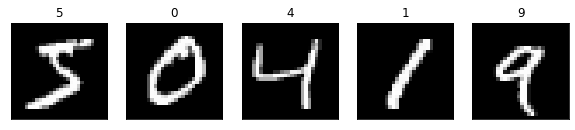

In [13]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [14]:
to_categorical(3, num_classes=10)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [16]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [22]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(8, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                90        
Total params: 11,993
Trainable params: 11,993
Non-trainable params: 0
_________________________________________________________________


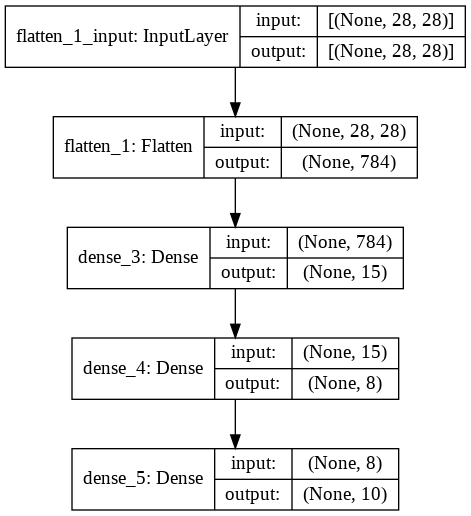

In [31]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [25]:
model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8142 - acc: 0.4833 - val_loss: 0.8573 - val_acc: 0.8291
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7513 - acc: 0.8451 - val_loss: 0.4932 - val_acc: 0.8919
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4414 - acc: 0.9000 - val_loss: 0.3514 - val_acc: 0.9127
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3297 - acc: 0.9182 - val_loss: 0.2964 - val_acc: 0.9214
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2775 - acc: 0.9284 - val_loss: 0.2678 - val_acc: 0.9274


In [32]:
predictions = model.predict(X_test)
print(predictions)

[[7.42274104e-04 4.56271169e-04 1.63641409e-04 ... 9.86300290e-01
  1.16834985e-04 4.73666610e-03]
 [5.69142494e-03 6.87601976e-04 9.69435275e-01 ... 1.43544574e-04
  2.73764919e-04 9.98018804e-05]
 [5.96759810e-06 9.75145817e-01 1.44026661e-02 ... 1.56077114e-03
  4.11059195e-03 1.27184918e-04]
 ...
 [3.68144782e-03 4.32712704e-06 3.87582550e-05 ... 9.37815697e-04
  7.48770777e-03 2.88652778e-02]
 [1.08958315e-03 3.23282974e-03 3.79690267e-02 ... 6.34845537e-06
  1.33478060e-01 1.40852353e-04]
 [1.10809570e-02 2.75876246e-05 3.53893475e-03 ... 8.45796967e-05
  3.73397997e-05 8.13309744e-05]]


In [34]:
predictions.shape

(10000, 10)

In [35]:
predictions[0]

array([7.42274104e-04, 4.56271169e-04, 1.63641409e-04, 7.45759113e-03,
       6.32382580e-06, 1.73835747e-06, 1.84097462e-05, 9.86300290e-01,
       1.16834985e-04, 4.73666610e-03], dtype=float32)

In [27]:
X_test.shape

(10000, 28, 28)

In [28]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


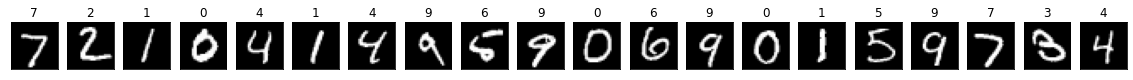

In [29]:
fig, axes = plt.subplots(ncols=20, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(20):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
#### pip install opencv-python

In [ ]:
import cv2

In [ ]:
img_gray=cv2.imread('online8.png',cv2.IMREAD_GRAYSCALE)

In [ ]:
img_gray

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 215, 169, 165, 113, 124, 182, 237, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 200, 157, 100,  54,  79,  43,  28,  87, 203, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 240, 205,  75,   0,   1,  52, 110, 140,  77,  40, 166, 255,
        255, 255],
       [25

In [ ]:
new=1-img_gray/255

In [ ]:
new

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

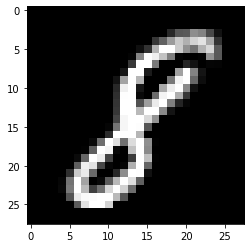

In [ ]:
plt.imshow(new,cmap='gray')

In [ ]:
mypredictions = model.predict(new.reshape(-1,28,28))


In [ ]:
mypredictions

array([[0.00738177, 0.00137321, 0.01473873, 0.16537735, 0.15623048,
        0.26869088, 0.06779967, 0.02667561, 0.022755  , 0.2689773 ]],
      dtype=float32)

In [ ]:
np.argmax(mypredictions, axis=1)


array([9], dtype=int64)